In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder\
                    .appName("Analyzing London Crime Data")\
                    .getOrCreate()

In [3]:
data = spark.read\
            .format("csv")\
            .option("header","true")\
            .load("../../data/london_crime_by_lsoa.csv")

In [4]:
data.printSchema()

root
 |-- lsoa_code: string (nullable = true)
 |-- borough: string (nullable = true)
 |-- major_category: string (nullable = true)
 |-- minor_category: string (nullable = true)
 |-- value: string (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)



In [5]:
data.count()

13490604

In [6]:
data.limit(5).show()

+---------+----------+--------------------+--------------------+-----+----+-----+
|lsoa_code|   borough|      major_category|      minor_category|value|year|month|
+---------+----------+--------------------+--------------------+-----+----+-----+
|E01001116|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004563|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+---------+----------+--------------------+--------------------+-----+----+-----+



In [7]:
data.dropna()

DataFrame[lsoa_code: string, borough: string, major_category: string, minor_category: string, value: string, year: string, month: string]

In [12]:
data = data.drop("lsoa_code")
data.show(5)

+----------+--------------------+--------------------+-----+----+-----+
|   borough|      major_category|      minor_category|value|year|month|
+----------+--------------------+--------------------+-----+----+-----+
|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+----------+--------------------+--------------------+-----+----+-----+
only showing top 5 rows



In [13]:
total_boroughs = data.select("borough")\
                     .distinct()
total_boroughs.show()

+--------------------+
|             borough|
+--------------------+
|             Croydon|
|          Wandsworth|
|              Bexley|
|             Lambeth|
|Barking and Dagenham|
|              Camden|
|           Greenwich|
|              Newham|
|       Tower Hamlets|
|            Hounslow|
|              Barnet|
|              Harrow|
|Kensington and Ch...|
|           Islington|
|               Brent|
|            Haringey|
|             Bromley|
|              Merton|
|         Westminster|
|             Hackney|
+--------------------+
only showing top 20 rows



In [14]:
total_boroughs.count()

33

In [15]:
hackney_data = data.filter(data["borough"]=="Hackney")
hackney_data.show(5)

+-------+--------------------+--------------------+-----+----+-----+
|borough|      major_category|      minor_category|value|year|month|
+-------+--------------------+--------------------+-----+----+-----+
|Hackney|     Criminal Damage|Criminal Damage T...|    0|2011|    6|
|Hackney|Violence Against ...|          Harassment|    1|2013|    2|
|Hackney|     Criminal Damage|Other Criminal Da...|    0|2011|    7|
|Hackney|Violence Against ...|        Wounding/GBH|    0|2013|   12|
|Hackney|  Theft and Handling|  Other Theft Person|    0|2016|    8|
|Hackney|            Burglary|Burglary in a Dwe...|    2|2008|    5|
|Hackney|             Robbery|   Business Property|    0|2016|    7|
|Hackney|  Theft and Handling|Theft/Taking of P...|    0|2009|   12|
|Hackney|               Drugs|    Drug Trafficking|    0|2014|    4|
|Hackney|  Theft and Handling|Handling Stolen G...|    0|2014|    6|
|Hackney|            Burglary|Burglary in Other...|    0|2008|   12|
|Hackney|Violence Against ...| Ass

In [16]:
data_2015_2016= data.filter(data['year'].isin(['2015','2016']))
data_2015_2016.sample(fraction=0.1).show()

+--------------------+--------------------+--------------------+-----+----+-----+
|             borough|      major_category|      minor_category|value|year|month|
+--------------------+--------------------+--------------------+-----+----+-----+
|             Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|           Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|             Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|            Lewisham|Violence Against ...|      Common Assault|    0|2016|    2|
|      Waltham Forest|Other Notifiable ...|      Going Equipped|    0|2015|    2|
|            Hounslow|Violence Against ...|    Offensive Weapon|    1|2015|   10|
|          Hillingdon|Violence Against ...|      Other violence|    0|2016|   11|
|              Bexley|  Theft and Handling|  Other Theft Person|    0|2016|    8|
|              Ealing|  Theft and Handling|Theft/Taking Of M...|    0|2016|    1|
|Hammersmith and

In [17]:
data_2014_onwards = data.filter(data['year']>=2014)
data_2014_onwards.sample(fraction=0.1).show()

+--------------------+--------------------+--------------------+-----+----+-----+
|             borough|      major_category|      minor_category|value|year|month|
+--------------------+--------------------+--------------------+-----+----+-----+
|              Ealing|             Robbery|   Personal Property|    0|2015|    7|
|              Newham|            Burglary|Burglary in Other...|    0|2015|    2|
|             Croydon|             Robbery|   Personal Property|    0|2016|    1|
|              Newham|  Theft and Handling|Theft/Taking of P...|    0|2016|    3|
|              Sutton|Violence Against ...|        Wounding/GBH|    0|2016|    7|
|             Croydon|Violence Against ...|      Common Assault|    1|2014|   11|
|Kingston upon Thames|Other Notifiable ...|      Going Equipped|    0|2014|    5|
|           Redbridge|               Drugs| Possession Of Drugs|    2|2016|   11|
|             Lambeth|     Criminal Damage|Criminal Damage T...|    0|2016|    7|
|          Wands

In [18]:
borough_crime_count = data.groupBy('borough')\
                          .count()
borough_crime_count.show(5)

+--------------------+------+
|             borough| count|
+--------------------+------+
|             Croydon|602100|
|          Wandsworth|498636|
|              Bexley|385668|
|             Lambeth|519048|
|Barking and Dagenham|311040|
+--------------------+------+
only showing top 5 rows



In [19]:
borough_convection_sum = data.groupBy('borough')\
                             .agg({'value':'sum'})
borough_convection_sum.show(5)

+--------------------+----------+
|             borough|sum(value)|
+--------------------+----------+
|             Croydon|  260294.0|
|          Wandsworth|  204741.0|
|              Bexley|  114136.0|
|             Lambeth|  292178.0|
|Barking and Dagenham|  149447.0|
+--------------------+----------+
only showing top 5 rows



In [22]:
borough_convection_sum= data.groupBy('borough')\
                             .agg({'value':'sum'})\
                             .withColumnRenamed('sum(value)','convictions')
borough_convection_sum.show(5)

+--------------------+-----------+
|             borough|convictions|
+--------------------+-----------+
|             Croydon|   260294.0|
|          Wandsworth|   204741.0|
|              Bexley|   114136.0|
|             Lambeth|   292178.0|
|Barking and Dagenham|   149447.0|
+--------------------+-----------+
only showing top 5 rows



In [23]:
total_borough_convictions = borough_convection_sum.agg({'convictions':'sum'})\
                                                  .withColumnRenamed('sum(convictions)',
                                                                   'total convictions')
total_borough_convictions.show()

+-----------------+
|total convictions|
+-----------------+
|        6447758.0|
+-----------------+



In [24]:
total_convictions=total_borough_convictions.collect()[0][0]

In [25]:
import pyspark.sql.functions as func

In [27]:
borough_percentage_contribution=borough_convection_sum\
                        .withColumn("% contribution",
                        func.round(borough_convection_sum.convictions/total_convictions *100,2))
borough_percentage_contribution.printSchema()

root
 |-- borough: string (nullable = true)
 |-- convictions: double (nullable = true)
 |-- % contribution: double (nullable = true)



In [28]:
borough_percentage_contribution.orderBy(borough_percentage_contribution[2].desc()).show(5)

+-----------+-----------+--------------+
|    borough|convictions|% contribution|
+-----------+-----------+--------------+
|Westminster|   455028.0|          7.06|
|    Lambeth|   292178.0|          4.53|
|  Southwark|   278809.0|          4.32|
|     Camden|   275147.0|          4.27|
|     Newham|   262024.0|          4.06|
+-----------+-----------+--------------+
only showing top 5 rows



In [30]:
conviction_monthly= data.filter(data['year']==2014)\
                        .groupBy('month')\
                        .agg({'value':'sum'})\
                        .withColumnRenamed('sum(value)','convictions')
total_convictions_monthly=conviction_monthly.agg({'convictions':'sum'}).collect()[0][0]
total_convictions_monthly=conviction_monthly.withColumn('percent',
                                                       func.round(conviction_monthly\
                                                                  .convictions/total_convictions_monthly*100,2))
total_convictions_monthly.columns

['month', 'convictions', 'percent']

In [31]:
total_convictions_monthly.orderBy(total_convictions_monthly.percent.desc()).show()

+-----+-----------+-------+
|month|convictions|percent|
+-----+-----------+-------+
|   10|    60537.0|    8.9|
|   11|    59704.0|   8.78|
|    7|    58564.0|   8.61|
|    3|    57669.0|   8.48|
|   12|    57565.0|   8.46|
|    6|    57039.0|   8.39|
|    9|    56933.0|   8.37|
|    5|    56327.0|   8.28|
|    8|    55641.0|   8.18|
|    1|    55515.0|   8.16|
|    4|    53467.0|   7.86|
|    2|    51222.0|   7.53|
+-----+-----------+-------+



In [34]:
crimes_category = data.groupBy('major_category')\
                        .agg({'value':'sum'})\
                        .withColumnRenamed('sum(value)','convictions')

In [35]:
crimes_category.orderBy(crimes_category['convictions'].desc()).show()

+--------------------+-----------+
|      major_category|convictions|
+--------------------+-----------+
|  Theft and Handling|  2661861.0|
|Violence Against ...|  1558081.0|
|            Burglary|   754293.0|
|     Criminal Damage|   630938.0|
|               Drugs|   470765.0|
|             Robbery|   258873.0|
|Other Notifiable ...|   106349.0|
|    Fraud or Forgery|     5325.0|
|     Sexual Offences|     1273.0|
+--------------------+-----------+



In [36]:
year_df = data.select('year')

In [43]:
year_df.agg({'year':'min'}).show()

+---------+
|min(year)|
+---------+
|     2008|
+---------+



In [50]:
year_df.agg({'year':'max'}).show()

+---------+
|max(year)|
+---------+
|     2016|
+---------+



In [51]:
year_df.describe().show()

+-------+-----------------+
|summary|             year|
+-------+-----------------+
|  count|         13490604|
|   mean|           2012.0|
| stddev|2.581988993167432|
|    min|             2008|
|    max|             2016|
+-------+-----------------+



In [52]:
data.crosstab('borough','major_category')\
    .select('borough_major_category','Burglary','Drugs','Fraud or Forgery','Robbery')\
    .show()

+----------------------+--------+-----+----------------+-------+
|borough_major_category|Burglary|Drugs|Fraud or Forgery|Robbery|
+----------------------+--------+-----+----------------+-------+
|              Havering|   32400|32616|            5508|  27648|
|                Merton|   26784|29160|            5724|  23652|
|              Haringey|   31320|35424|           10368|  29484|
|         Tower Hamlets|   31104|37368|            5400|  28512|
|               Bromley|   42552|42336|            8532|  34668|
|               Enfield|   39528|44064|            9720|  35532|
|  Kingston upon Thames|   21168|22140|            3780|  15660|
|           Westminster|   27648|32616|            8748|  25056|
|  Richmond upon Thames|   24840|23004|            2808|  18468|
|              Lewisham|   36504|43740|           11016|  34884|
|                 Brent|   37368|46980|            9288|  34128|
|  Barking and Dagenham|   23760|26244|            7236|  22248|
|             Redbridge| 

In [58]:
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [61]:
def describe_year(year):
    yearly_details= data.filter(data.year==year)\
                        .groupBy('borough')\
                        .agg({'value':'sum'})\
                        .withColumnRenamed('sum(value)','convictions')\
                        .orderBy('convictions')
    borough_list=[x[0] for x in yearly_details.toLocalIterator()]
    convictions_list=[x[1] for x in yearly_details.toLocalIterator()]
    plt.figure(figsize=(33,10))
    plt.bar(borough_list,convictions_list)
    plt.title('Crime for the year: '+year,fontsize=30)
    plt.xlabel('Boroughs',fontsize=30)
    plt.ylabel('Convictions',fontsize=30)
    plt.xticks(rotation=90,fontsize=30)
    plt.yticks(fontsize=30)
    plt.autoscale()
    plt.show()

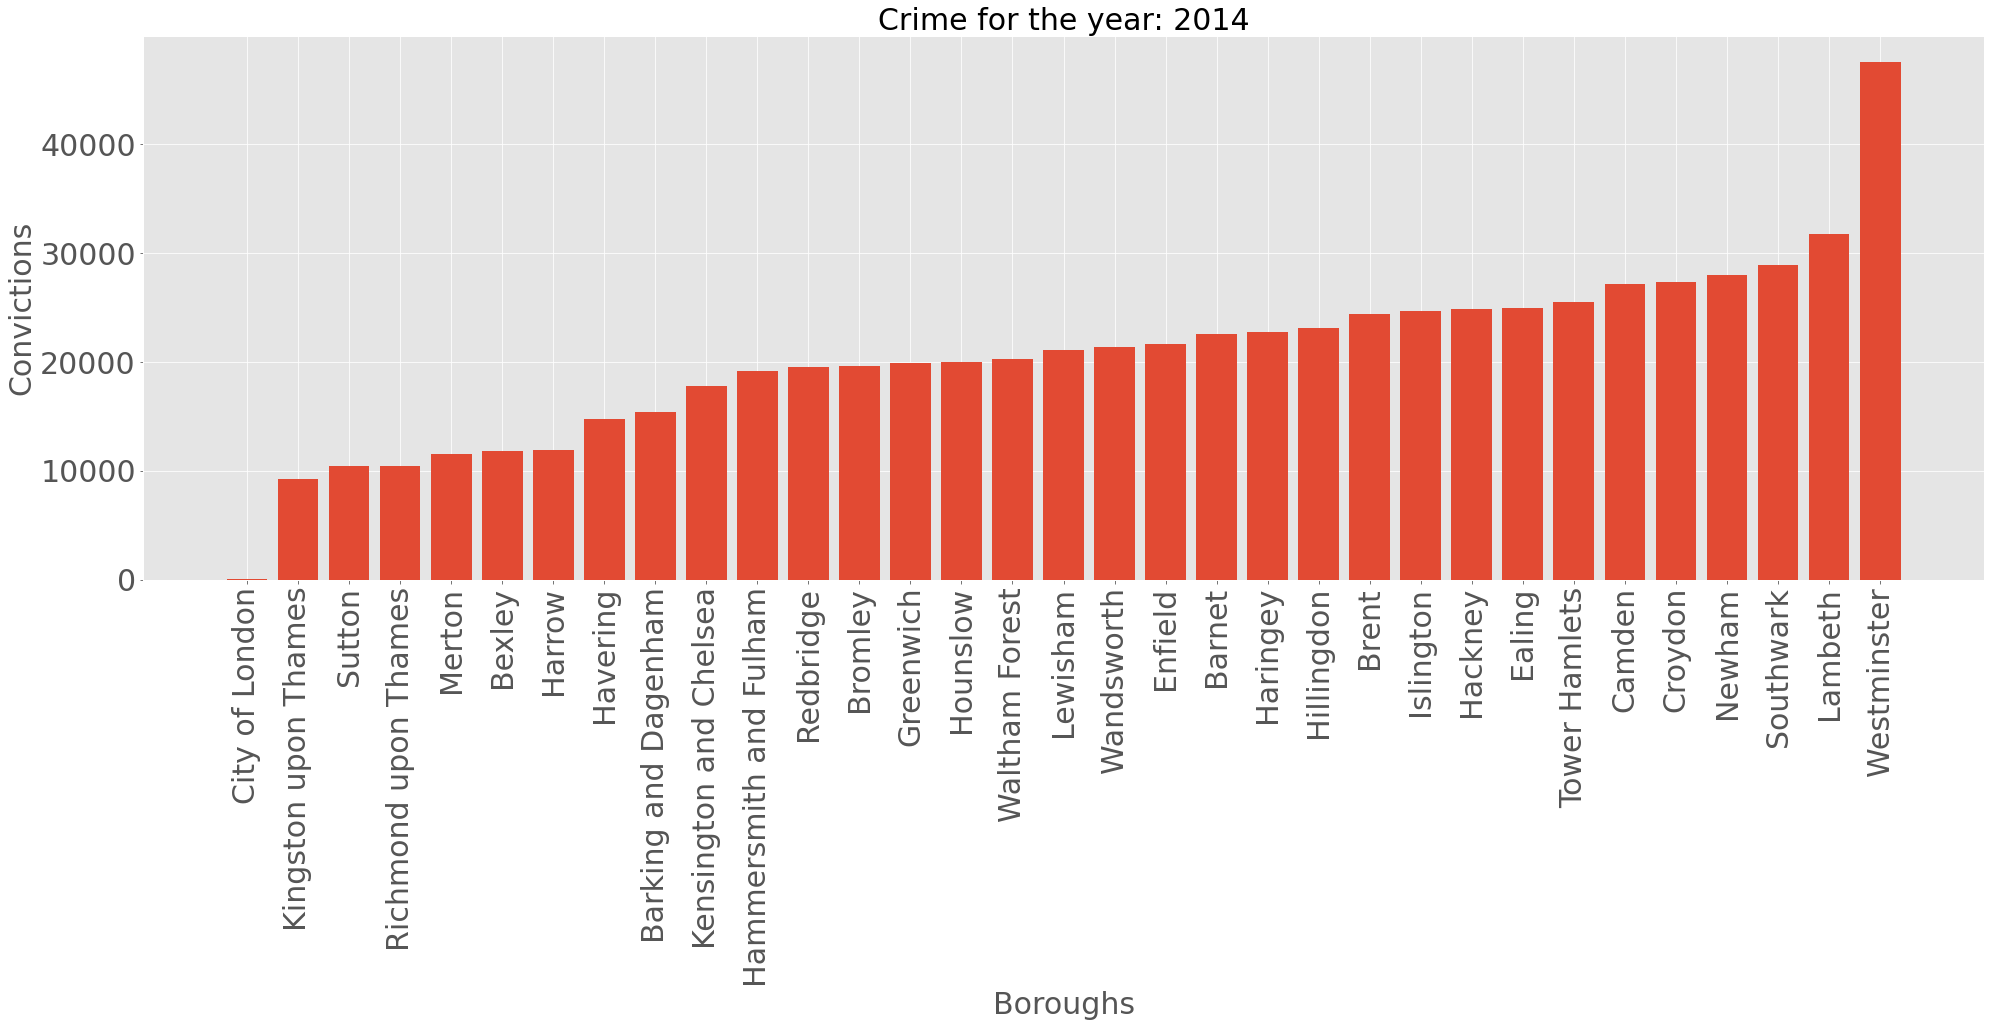

In [62]:
describe_year('2014')